In [1]:
# for Mathematical Operations
import numpy as np

# For DataFrame Operations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets Import the Dataset
data = pd.read_csv('Employee_Data.csv')

# lets check the shape of the dataset
data.shape

(1470, 35)

In [3]:
# lets check the Top 5 Rows of the Dataset

pd.set_option('max_columns', 35)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Lets find out all the Useless Columns

print("Number of Records in the Dataset :", data.shape[0])
print("Number of Unique Values in Employee Count Column :", data['EmployeeCount'].nunique())
print("Number of Unique Values in Employee Number Column :", data['EmployeeNumber'].nunique())
print("Number of Unique Values in Over 18 Column :", data['Over18'].nunique())
print("Number of Unique Values in Standard Hours Column :", data['StandardHours'].nunique())

Number of Records in the Dataset : 1470
Number of Unique Values in Employee Count Column : 1
Number of Unique Values in Employee Number Column : 1470
Number of Unique Values in Over 18 Column : 1
Number of Unique Values in Standard Hours Column : 1


* We can see that either these columns has all the values unique such as the Employee Number Column or these Columns has a Unique Value.
* These Kinds of Columns are useless for Predictive analysis as they do not have any Trends or Patterns Associated with them.
* Lets Drop these Columns from the Dataset

In [5]:
# Lets remove these Columns from the Dataset

data = data.drop(['EmployeeCount', 'EmployeeNumber',
                 'Over18', 'StandardHours'], axis = 1)

# lets check the Number of Columns after Removal of 4 columns from 35 Columns
print("Number of Columns Left in the Dataset after Removal of 4 Columns :", data.shape[1])

Number of Columns Left in the Dataset after Removal of 4 Columns : 31


In [6]:
# Lets check Missing Values
data.isnull().sum().sum()

0

In [7]:
# Lets check the Columns with Object Data Types
data.select_dtypes('object').head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [8]:
# Lets Encode these Object Data Types as Numerical Data Types

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

# lets again check whether there any Object Data Type Columns are Left
data.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [9]:
# lets split the Target Column Attrition from the Dataset

y = data['Attrition']
x = data.drop(['Attrition'], axis = 1)

# lets check the shape of the dataset
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1470, 30)
Shape of y:  (1470,)


In [10]:
## Lets Check the Attrition Column
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [19]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x, y)

# Making the Samples
x, y = sn.fit_resample(x, y)

# Class Distribution
y.value_counts()

Yes    809
No     807
Name: Attrition, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train.shape)
print("Shape of xtest: ", x_test.shape)
print("Shape of ytrain :", y_train.shape)
print("Shape of ytest :", y_test.shape)

Shape of xtrain:  (1292, 30)
Shape of xtest:  (324, 30)
Shape of ytrain : (1292,)
Shape of ytest : (324,)


In [25]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       156
         Yes       0.90      0.88      0.89       168

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.88      0.88      0.88       324



### Correlation Filtering

* Remove Highly Correlated Features from the Data

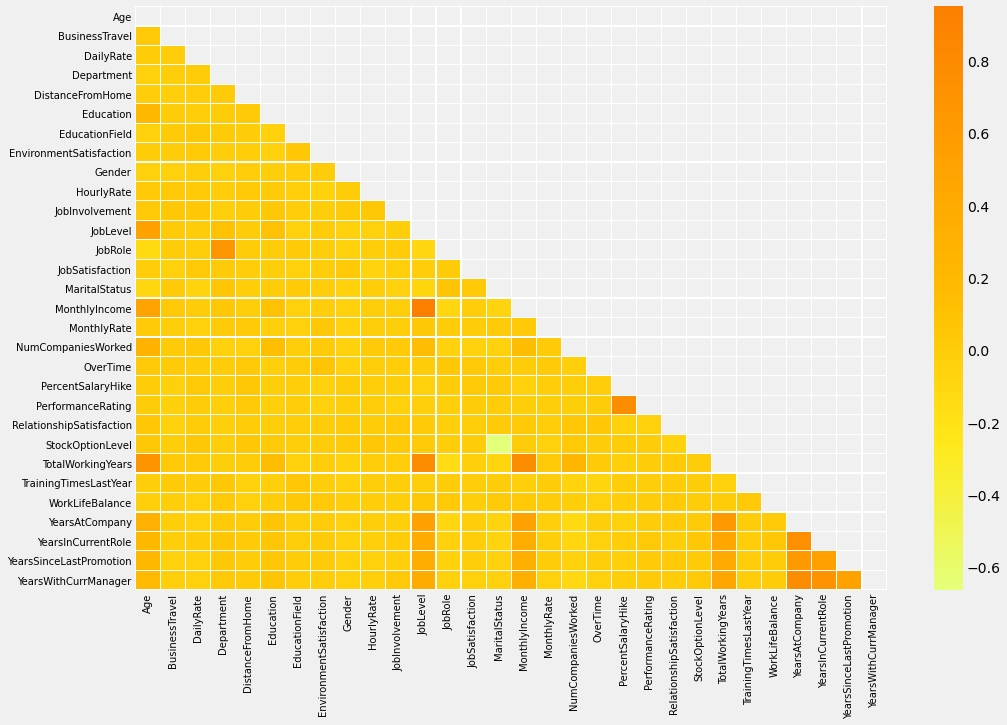

In [26]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, cmap = 'Wistia', linewidths = 0.2)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

* Age is Highly Correlated with Job Level, Monthly Income, and TotalWorking Years 
* Job Role and Department are Highly Correlated
* Job Level is Highly Correlated with TotalWorkingyears and MonthlyIncome
* Performance Rating and PercentSalaryHike are Highly Correlated
* YearsInCurrentRole is Highly Correlated with YearsAtCompany and YearsWithCurrManager

In [27]:
# Lets Remove the Highly Correlated Columns from the Datasets

data_cf = data.drop(['JobRole', 'JobLevel', 'PercentSalaryHike', 'TotalWorkingYears',
                     'YearsInCurrentRole', 'YearsWithCurrManager'], axis = 1)

# lets check the shape of the dataset after removal of 5 Columns from 35 Columns
data_cf.shape

(1470, 25)

In [28]:
# Lets Encode these Object Data Types as Numerical Data Types

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_cf['BusinessTravel'] = le.fit_transform(data_cf['BusinessTravel'])
data_cf['Department'] = le.fit_transform(data_cf['Department'])
data_cf['EducationField'] = le.fit_transform(data_cf['EducationField'])
data_cf['Gender'] = le.fit_transform(data_cf['Gender'])
data_cf['MaritalStatus'] = le.fit_transform(data_cf['MaritalStatus'])
data_cf['OverTime'] = le.fit_transform(data_cf['OverTime'])

# lets again check whether there any Object Data Type Columns are Left
data_cf.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [29]:
# Now, Split the Dataset

y_cf = data_cf['Attrition']
x_cf = data_cf.drop(['Attrition'], axis = 1)

In [32]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_cf, y_cf)

# Making the Samples
x_cf, y_cf = sn.fit_resample(x_cf, y_cf)

# Class Distribution
y_cf.value_counts()

Yes    838
No     641
Name: Attrition, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

x_train_cf, x_test_cf, y_train_cf, y_test_cf = train_test_split(x_cf, y_cf, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_cf.shape)
print("Shape of xtest: ", x_test_cf.shape)
print("Shape of ytrain :", y_train_cf.shape)
print("Shape of ytest :", y_test_cf.shape)

Shape of xtrain:  (1183, 24)
Shape of xtest:  (296, 24)
Shape of ytrain : (1183,)
Shape of ytest : (296,)


In [34]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_cf, y_train_cf)
y_pred_cf = model.predict(x_test_cf)

cr = classification_report(y_pred_cf, y_test_cf)
print(cr)

              precision    recall  f1-score   support

          No       0.74      0.87      0.80       115
         Yes       0.91      0.80      0.85       181

    accuracy                           0.83       296
   macro avg       0.82      0.84      0.82       296
weighted avg       0.84      0.83      0.83       296



### Variance Inflation Filtering

* Remove all the Features having High Variance
* VIF above 5 indicates a high multicollinearity. 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
vif_data.style.background_gradient(cmap = 'Wistia')

,feature,VIF
0,Age,38.773522
1,BusinessTravel,6.798032
2,DailyRate,5.766591
3,Department,10.516928
4,DistanceFromHome,2.757965
5,Education,10.111642
6,EducationField,4.031612
7,EnvironmentSatisfaction,7.329485
8,Gender,2.068395
9,HourlyRate,14.132642


In [36]:
# lets create the Dependent and Non Dependent Sets
x_vif = data[['DistanceFromHome', 'EducationField', 'Gender', 'NumCompaniesWorked','OverTime',
           'StockOptionLevel','YearsSinceLastPromotion']]
y_vif = data['Attrition']

In [37]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_vif, y_vif)

# Making the Samples
x_vif, y_vif = sn.fit_resample(x_vif, y_vif)

# Class Distribution
y_vif.value_counts()

Yes    813
No     579
Name: Attrition, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

x_train_vif, x_test_vif, y_train_vif, y_test_vif = train_test_split(x_vif, y_vif, test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_vif.shape)
print("Shape of xtest: ", x_test_vif.shape)
print("Shape of ytrain :", y_train_vif.shape)
print("Shape of ytest :", y_test_vif.shape)

Shape of xtrain:  (1113, 7)
Shape of xtest:  (279, 7)
Shape of ytrain : (1113,)
Shape of ytest : (279,)


In [39]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_vif, y_train_vif)
y_pred_vif = model.predict(x_test_vif)

cr = classification_report(y_pred_vif, y_test_vif)
print(cr)

              precision    recall  f1-score   support

          No       0.81      0.96      0.88       107
         Yes       0.97      0.86      0.91       172

    accuracy                           0.90       279
   macro avg       0.89      0.91      0.90       279
weighted avg       0.91      0.90      0.90       279



### Feature Selection with RFECV

* Recursive Elimination of Features from the Dataset to Reduce the Complexity

In [43]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = DecisionTreeClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train.values, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 3
Best features : Index(['JobLevel', 'MonthlyIncome', 'MonthlyRate'], dtype='object')


In [44]:
# lets Create the Dependent and Independent Sets for RFECV

x_rfecv = data[['JobLevel','MonthlyIncome','MonthlyRate']]
y_rfecv = data['Attrition']

In [46]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_rfecv, y_rfecv)

# Making the Samples
x_rfecv, y_rfecv = sn.fit_resample(x_rfecv, y_rfecv)

# Class Distribution
y_rfecv.value_counts()

Yes    646
No     603
Name: Attrition, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

x_train_rfecv, x_test_rfecv, y_train_rfecv, y_test_rfecv = train_test_split(x_rfecv, y_rfecv,
                                                                            test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_rfecv.shape)
print("Shape of xtest: ", x_test_rfecv.shape)
print("Shape of ytrain :", y_train_rfecv.shape)
print("Shape of ytest :", y_test_rfecv.shape)

Shape of xtrain:  (999, 3)
Shape of xtest:  (250, 3)
Shape of ytrain : (999,)
Shape of ytest : (250,)


In [48]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_rfecv, y_train_rfecv)
y_pred_rfecv = model.predict(x_test_rfecv)

cr = classification_report(y_pred_rfecv, y_test_rfecv)
print(cr)

              precision    recall  f1-score   support

          No       0.91      0.92      0.92       115
         Yes       0.93      0.93      0.93       135

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



### Feature Selection using the Boruta Algorithm

* In Boruta, features do not compete among themselves. Instead — and this is the first brilliant idea — they compete with a randomized version of them.

In [49]:
# Implementing the Boruta Algorithm
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# defining the Model
model= RandomForestClassifier(max_depth = 5)

# define Boruta feature selection method
boruta = BorutaPy(estimator = model, n_estimators = 'auto',
                  max_iter = 100, random_state = 0)

# find all relevant features
boruta.fit(np.array(x), np.array(y))

### print results
best_features = x.columns[boruta.support_].to_list()
print('features to Keep:', best_features)

features to Keep: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [50]:
# lets Create the Dependent and Independent Sets for RFECV

x_bor = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction',
                'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
y_bor = data['Attrition']

In [52]:
from imblearn.combine import SMOTEENN

# defining the Model
sn = SMOTEENN(random_state = 0)

# Training the Model
sn.fit(x_bor, y_bor)

# Making the Samples
x_bor, y_bor = sn.fit_resample(x_bor, y_bor)

# Class Distribution
y_bor.value_counts()

Yes    838
No     640
Name: Attrition, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

x_train_bor, x_test_bor, y_train_bor, y_test_bor = train_test_split(x_bor, y_bor,
                                                                            test_size = 0.2, random_state = 0)

print("Shape of xtrain: ", x_train_bor.shape)
print("Shape of xtest: ", x_test_bor.shape)
print("Shape of ytrain :", y_train_bor.shape)
print("Shape of ytest :", y_test_bor.shape)

Shape of xtrain:  (1182, 22)
Shape of xtest:  (296, 22)
Shape of ytrain : (1182,)
Shape of ytest : (296,)


In [54]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_bor, y_train_bor)
y_pred_bor = model.predict(x_test_bor)

cr = classification_report(y_pred_bor, y_test_bor)
print(cr)

              precision    recall  f1-score   support

          No       0.80      0.87      0.83       127
         Yes       0.89      0.83      0.86       169

    accuracy                           0.85       296
   macro avg       0.84      0.85      0.85       296
weighted avg       0.85      0.85      0.85       296



### Principal Component Analysis
* The principal components of a collection of points in a real p-space that are a sequence of p direction vectors, where the ith vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors.

In [56]:
# lets determine the Value of N-Components
from sklearn.decomposition import PCA

# Lets create the PCA Model
pca = PCA(n_components = None)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# This result the variance explained by the number of components taken into account
pca.explained_variance_ratio_.cumsum()

array([0.70121545, 0.99793101, 0.99999233, 0.999997  , 0.99999798,
       0.99999875, 0.99999927, 0.99999944, 0.99999958, 0.99999966,
       0.99999972, 0.99999978, 0.99999983, 0.99999986, 0.99999988,
       0.9999999 , 0.99999992, 0.99999993, 0.99999995, 0.99999996,
       0.99999997, 0.99999997, 0.99999998, 0.99999999, 0.99999999,
       0.99999999, 1.        , 1.        , 1.        , 1.        ])

In [57]:
from sklearn.decomposition import PCA

# Lets create the PCA Model
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [58]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_pca, y_train)
y_pred_pca = model.predict(x_test_pca)

cr = classification_report(y_pred_pca, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.91      0.95      0.93       154
         Yes       0.95      0.92      0.93       170

    accuracy                           0.93       324
   macro avg       0.93      0.93      0.93       324
weighted avg       0.93      0.93      0.93       324



In [59]:
# lets check How these Components will look

df = pd.DataFrame({'x_train_pca0':x_train_pca[:,0],
                 'x_train_pca1':x_train_pca[:,1],
                 'Attrition':y_train})
df.head()

,x_train_pca0,x_train_pca1,Attrition
211,-6527.478101,12696.045168,No
1245,854.298666,-3403.885684,Yes
512,4791.429163,13.855267,No
1552,10937.947646,-2851.892408,Yes
513,-690.995398,-2093.674665,No


C:\Users\Nazhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


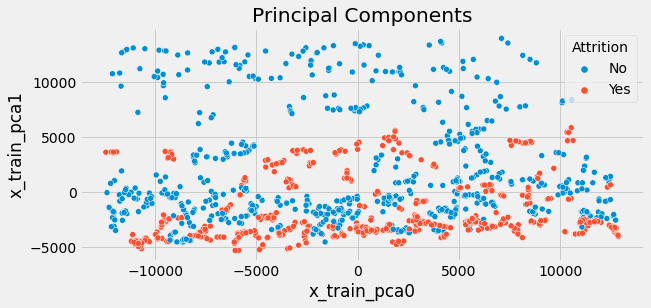

In [60]:
# lets plot the Principal Components

plt.rcParams['figure.figsize'] = (9, 4)
plt.style.use('fivethirtyeight')

sns.scatterplot(df['x_train_pca0'], df['x_train_pca1'],
                hue = df['Attrition'])
plt.title('Principal Components')
plt.show()

### t-SNE
* t-distributed stochastic neighbor embedding is a machine learning algorithm for visualization based on Stochastic Neighbor Embedding originally developed by Sam Roweis and Geoffrey Hinton, where Laurens van der Maaten proposed the t-distributed variant.

In [61]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
x_train_tsne = pca.fit_transform(x_train)
x_test_tsne = pca.transform(x_test)

In [62]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_tsne, y_train)
y_pred_tsne = model.predict(x_test_tsne)

cr = classification_report(y_pred_tsne, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.91      0.95      0.93       153
         Yes       0.96      0.92      0.94       171

    accuracy                           0.94       324
   macro avg       0.93      0.94      0.94       324
weighted avg       0.94      0.94      0.94       324



### Linear Discriminant Analysis
* a technique that is used to reduce a large number of variables into fewer numbers of factors. The values of observed data are expressed as functions of a number of possible causes in order to find which are the most important.

In [63]:
# Implementing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lets define the Model
lda = LDA(n_components = None)
x_lda = lda.fit_transform(x_train, y_train)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

In [64]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

# lets run the function
select_n_components(lda_var_ratios, 0.95)

1

In [65]:
# lets define the Model
lda = LDA(n_components = 1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [66]:
# Lets create a Predictive Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_lda, y_train)
y_pred_lda = model.predict(x_test_lda)

cr = classification_report(y_pred_lda, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.79      0.77      0.78       165
         Yes       0.77      0.79      0.78       159

    accuracy                           0.78       324
   macro avg       0.78      0.78      0.78       324
weighted avg       0.78      0.78      0.78       324

